In [25]:
from latools import *
from sympy import *
init_printing(use_latex=True)

# Eigenvalues, Eigenvectors and Eigenspaces

Let $L:\mathbb{R}^n\to\mathbb{R}^n$. We will assume that $L$ is specified in terms of its matrix in the standard basis:
$$
L(\mathbf{v})=A\mathbf{v}
$$
where $A$ is a $n\times n$ matrix.

We say that the scalar $\lambda$ is an _eigenvalue_ of $L$ (or $A$) if there is a nonzero vector $\mathbf{v}$ such that:
$$
A\mathbf{v}=\lambda\mathbf{v}
$$
Any nonzero vector $\mathbf{v}$ for which the identity above is true is called an _eigenvector_ associated to $\lambda$.

The requirement $\mathbf{v}\ne0$ is extremely important, and leads to the following theorem, which is the starting step for finding eigenvalues and eigenvectors:

__Theorem__. A scalar $\lambda$ is an eigenvalue if any of the following three equivalent conditions hold:

- $A-\lambda I$ is singular.
- $\det(A-\lambda I)=0$
- The homogeneous system $(A-\lambda I)\mathbf{v}=\mathbf{0}$ has infinitely many solutions.

If $\lambda$ is an eigenvalue, the solution set of the system:
$$
(A-\lambda I)\mathbf{v}=\mathbf{0}
$$
is called the _eigenspace_ associated to $\lambda$.

The main goal of this notebook is to demonstrate how to find eigenvalues, eigenvectors and eigenspaces. The procedure is as follows:

1. Compute $f(\lambda)=\det(A-\lambda I)$. $f(\lambda)$ is a polynomial of degree $n$ in the variable $\lambda$, known as the _characteristic polynomial_ of the matrix $A$ (or the linear transformation $L$).
2. Solve the equation $p(\lambda)=0$. The solution will be a set of $n$ scalars: $\lambda_1,\lambda_2,\ldots,\lambda_n$. The set of solutions may have repeated zeros. It can also have complex zeros, but we will deal with these later.
3. For each distinct $\lambda_i$, solve the system $(A-\lambda I)\mathbf{v}=\mathbf{0}$. The solution set of this system is the eigenspace associated to $\lambda_i$, which we denote by $E(\lambda_i)$. We are typically interested in finding a basis for this subspace.

The rest of this notebook consists of examples of the whole procedure.

## Example 1

Find the eigenvalues, eigenvectors and eigenspaces for the linear transformation $L:\mathbb{R}^2\to\mathbb{R}^2$ given by:
$$
L\left(\begin{bmatrix}x\\y\end{bmatrix}\right)=
\begin{bmatrix}
\frac{4}{3}x-\frac{10}{3}y\\
-\frac{5}{3}x-\frac{1}{3}y
\end{bmatrix}
$$

_Solution_: We first write the linear transformation using matrix multiplication:
$$
L\left(\begin{bmatrix}x\\y\end{bmatrix}\right)=
\left[\begin{matrix}\frac{4}{3} & - \frac{10}{3}\\- \frac{5}{3} & - \frac{1}{3}\end{matrix}\right]
\begin{bmatrix}x\\y\end{bmatrix}
$$
We start by defining the matrix $A$:

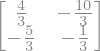

In [26]:
A = rational_matrix([[ 4/3, -10/3],
                     [-5/3,  -1/3]])
A

Next compute the characteristic polynomial $p(\lambda)=\det(A-\lambda I)$. Notice that the $2\times 2$ identity matrix is denoted by `eye(2)`. Also notice that `lambda` is a reserved word in Python, so we use `lbd` for the symbolic variable $\lambda$.

In [27]:
lbd= symbols('lambda')
p = det(A - lbd*eye(2))
p

To find the eigenvalues we factor $p$:

In [28]:
factor(p)

The eigenvalues are the solutions of $p(\lambda)=0$:
$$
\lambda_1=-2,\quad\lambda_2=3
$$
Next we need to find the eigenspace for each eigenvector:

##### Eigenspace of $\lambda_1=-2$:

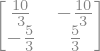

In [29]:
M = A - (-2)*eye(2)
M

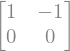

In [30]:
R = reduced_row_echelon_form(M)
R

The system corresponding to this matrix is:
$$
x-y=0
$$
This system has one free variable, $y$, so we get a single vector on the basis of the eigenspace, for example by letting $y=1$ and $x=1$
$$
\left\{\begin{bmatrix}1\\1\end{bmatrix}\right\}
$$
The eigenspace can be written as:
$$
E(-2)=\left\{c\begin{bmatrix}1\\1\end{bmatrix}\,:\,c\in\mathbb{R}\right\}
$$

##### Eigenspace of $\lambda_2=3$:

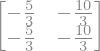

In [31]:
M = A - (3)*eye(2)
M

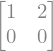

In [32]:
R = reduced_row_echelon_form(M)
R

The system corresponding to this matrix is:
$$
x+2y=0
$$
This system has one free variable, $y$, so we get a single vector on the basis of the eigenspace, for example by letting $y=1$ and $x=-2$
$$
\left\{\begin{bmatrix}-2\\1\end{bmatrix}\right\}
$$
The eigenspace can be written as:
$$
E(3)=\left\{c\begin{bmatrix}-2\\1\end{bmatrix}\,:\,c\in\mathbb{R}\right\}
$$

#### Summary of solution:

$$
\text{Eigenvalue: }\lambda_1=-2,\quad \text{Basis of eigenspace: }\left\{\begin{bmatrix}-1\\1\end{bmatrix}\right\}
$$

$$
\text{Eigenvalue: }\lambda_2={3},\quad \text{Basis of eigenspace: }\left\{\begin{bmatrix}-2\\1\end{bmatrix}\right\}
$$

## Example 2:
Find the eigenvalues and corresponding eigenspaces for the matrix:
$$
A=\left[\begin{matrix}14 & 6 & -2 & 4\\-6 & -1 & 2 & -1\\24 & 12 & -1 & 9\\-24 & -12 & 2 & -8\end{matrix}\right]
$$

_Solution_:

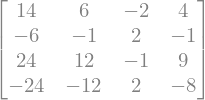

In [33]:
A = rational_matrix([[ 14,   6, -2,  4],
                        [ -6,  -1,  2, -1],
                        [ 24,  12, -1,  9],
                        [-24, -12,  2, -8]])
A

Characteristic polynomial

In [34]:
lbd=symbols('lambda')
p = det(A - lbd*eye(4))
p

Factor the characteristic polynomial:

In [35]:
factor(p)

The eigenvalues are $\lambda_1=-1$, $\lambda_2=1$ and $\lambda_3=2$.

We now need to find the eigenspace of each eigenvalue:

##### Eigenspace of $\lambda_1=-1$

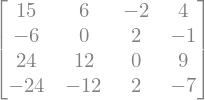

In [36]:
M = A - (-1)*eye(4)
M

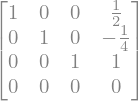

In [37]:
R = reduced_row_echelon_form(M)
R

The system corresponding to this matrix, using $x_1$, $x_2$, $x_3$, $x_4$ as variables:
\begin{align*}
x_1+\frac{1}{2}x_4&=0\\
x_2-\frac{1}{4}x_4&=0\\
x_3+x_4&=0
\end{align*}
There is one free variable, so the dimension of the eigenspace is 1. We get a basis by, for example, choosing $x_4=4$, which gives $x_1=-2$, $x_2=1$ and $x_3=-4$, so we get the basis:
$$
\left\{\begin{bmatrix}-2\\1\\-4\\4\end{bmatrix}\right\}
$$
The eigenspace is:
$$
E(-1)=\left\{c\begin{bmatrix}-2\\1\\-4\\4\end{bmatrix}\,:\,c\in\mathbb{R}\right\}
$$

##### Eigenspace of $\lambda_2=1$:

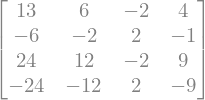

In [38]:
M = A - (1)*eye(4)
M

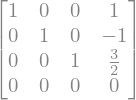

In [39]:
R = reduced_row_echelon_form(M)
R

The equations now are:
\begin{align*}
x_1+x_4&=0\\
x_2-x_4&=0\\
x_3+\frac{3}{2}x_4&=0
\end{align*}
The only free variable is $x_4$, so the eigenspace has dimension $1$. To get a basis of the eigenspace we can, for example, let $x_4=2$, so that $x_1=-2$, $x_2=2$ and $x_3=-3$. This gives the basis:
$$
\left\{\begin{bmatrix}-2\\2\\-3\\2\end{bmatrix}\right\}
$$
The eigenspace is then:
$$
E(1)=\left\{c\begin{bmatrix}-2\\2\\-3\\2\end{bmatrix}\,:\,c\in\mathbb{R}\right\}
$$

##### Eigenspace of $\lambda_3=2$:

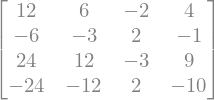

In [40]:
M = A - (2)*eye(4)
M

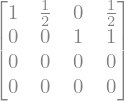

In [41]:
R = reduced_row_echelon_form(M)
R

The system is:
\begin{align*}
x_1+\frac{1}{2}x_2+\frac{1}{2}x_4&=0\\
x_3+x_4&=0
\end{align*}
Now the system has _two_ free variables, $x_2$ and $x_4$, so the eigenspace will have dimension $2$, and we need two values in the basis. We do it in the "standard" way:

Let $\begin{bmatrix}x_2\\x_4\end{bmatrix}=\begin{bmatrix}1\\0\end{bmatrix}$. Then $x_1=-\frac{1}{2}$ and $x_3=0$. We get the vector:
$$
\begin{bmatrix}-\frac{1}{2}\\1\\0\\0\end{bmatrix}
$$

Let $\begin{bmatrix}x_2\\x_4\end{bmatrix}=\begin{bmatrix}0\\1\end{bmatrix}$. Then $x_1=-\frac{1}{2}$ and $x_3=-1$. We get the vector:
$$
\begin{bmatrix}-\frac{1}{2}\\0\\-1\\1\end{bmatrix}
$$
We conclude that the basis of the eigenspace is:
$$
\left\{\begin{bmatrix}-\frac{1}{2}\\1\\0\\0\end{bmatrix},\begin{bmatrix}-\frac{1}{2}\\0\\-1\\1\end{bmatrix}\right\}
$$
So, the eigenspace is:
$$
\left\{
c_1\begin{bmatrix}-\frac{1}{2}\\1\\0\\0\end{bmatrix}+c_2\begin{bmatrix}-\frac{1}{2}\\0\\-1\\1\end{bmatrix}\,:\,
c_1,c_2\in\mathbb{R}\right\}
$$

##### Summary of solution:

$$\text{Eigenvalue: }\lambda_1=-1 ,\quad\text{Basis of eigenspace: } \left\{\begin{bmatrix}-2\\1\\-4\\4\end{bmatrix}\right\}$$

$$\text{Eigenvalue: }\lambda_2=1 ,\quad\text{Basis of eigenspace: } \left\{\begin{bmatrix}-2\\2\\-3\\2\end{bmatrix}\right\}$$

$$\text{Eigenvalue: }\lambda_2=2 ,\quad\text{Basis of eigenspace: } \left\{\begin{bmatrix}-\frac{1}{2}\\1\\0\\0\end{bmatrix},\begin{bmatrix}-\frac{1}{2}\\0\\-1\\1\end{bmatrix}\right\}$$



## Example 3

Find all eigenvalues and corresponding eigenspaces for the matrix:
$$
A=\left[\begin{matrix}9 & 6 & 3\\-29 & -22 & -15\\27 & 22 & 17\end{matrix}\right]
$$

_Solution_:

Define the matrix $A$, compute the characteristic polynomial and find its roots:

In [42]:
A = rational_matrix([[  9,   6,   3],
                     [-29, -22, -15],
                     [ 27,  22,  17]])
lbd=symbols('lambda')
p = det(A - lbd*eye(3))
factor(p)

There are two eigenvalues: $\lambda_1=0$ and $\lambda_2=2$. 

Let's now find the eigenspace for each of the two eigenvalues.

##### Eigenspace of $\lambda_1=0$

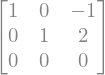

In [43]:
M = A - 0*eye(3)
R = reduced_row_echelon_form(M)
R

The system corresponding to this matrix is:
\begin{align*}
x_1-x_3&=0\\
x_2+2x_3&=0
\end{align*}
The system has one free variable, $x_3$, so the eigenspace has dimension $1$. We let $x_3=1$, and get $x_1=1$, $x_2=-2$, so a basis for the eigenspace is:
$$
\left\{\begin{bmatrix}1\\-2\\1\\\end{bmatrix}\right\}
$$
The eigenspace is:
$$
E(0)=\left\{c\begin{bmatrix}1\\-2\\1\\\end{bmatrix}\;:\;c\in\mathbb{R}\right\}
$$

##### Eigenspace of $\lambda_2=2$

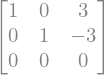

In [44]:
M = A - 2*eye(3)
R = reduced_row_echelon_form(M)
R

The system correspoding to this matrix is:
\begin{align*}
x_1+3x_3&=0\\
x_2-3x_3&=0
\end{align*}
There is one free variable, $x_3$, so the eigenspace has dimension 1. Letting $x_3=1$ we get $x_1=-3$ and $x_2=3$, so a basis of the eigenspace is:
$$
\left\{\begin{bmatrix}-3\\3\\1\end{bmatrix}\right\}
$$
The eigenspace is:
$$
\left\{c\begin{bmatrix}-3\\3\\1\end{bmatrix} \,:\, c\in\mathbb{R}\right\}
$$

##### Summary of solution:

$$\text{Eigenvalue: }\lambda_1=0 ,\quad\text{Basis of eigenspace: } 
\left\{\begin{bmatrix}1\\-2\\1\\\end{bmatrix}\right\}$$

$$\text{Eigenvalue: }\lambda_2=2 ,\quad\text{Basis of eigenspace: } \left\{\begin{bmatrix}-3\\3\\1\end{bmatrix}\right\}$$

We notice an important aspect in which this example differs from the previous ones. The sum of the dimensions of the eigenspaces in this case is 2, which is smaller than the dimension of the whole vector space, $\mathbb{R}^3$. As we will see, this has important consequences.

## Exercises

For each of the following matrices, do the following:

- Find all eigenvalues.
- For each eigenvalue, find a basis of the corresponding eigenspace.

1.
$$
A = \left[\begin{matrix}1 & 0 & 3\\3 & -1 & 2\\0 & 0 & -2\end{matrix}\right]
$$

2.
$$
A = \left[\begin{matrix}\frac{7}{10} & \frac{1}{10} & \frac{8}{5} & 0\\-1 & 0 & -2 & 0\\- \frac{2}{5} & - \frac{1}{5} & - \frac{6}{5} & 0\\- \frac{3}{5} & - \frac{3}{10} & - \frac{9}{5} & \frac{1}{2}\end{matrix}\right]
$$

3.
$$
A = \left[\begin{matrix}1 & -1 & 2 & 2\\3 & 5 & 2 & -6\\\frac{3}{2} & \frac{1}{2} & 1 & -2\\3 & 3 & 2 & -4\end{matrix}\right]
$$

4.
$$
A = \left[\begin{matrix}13 & - \frac{15}{2} & -6 & \frac{9}{2}\\4 & 2 & -4 & 3\\4 & -5 & 3 & 3\\4 & -5 & -4 & 10\end{matrix}\right]
$$